In [259]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [113]:
plt.style.use('ggplot')

In [114]:
block1_df = pd.read_csv('donation/block_1.zip')

In [115]:
block1_df.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333333333333,?,1.0,?,1,1,1,1,0,True
1,39086,47614,1,?,1.0,?,1,1,1,1,1,True
2,70031,70237,1,?,1.0,?,1,1,1,1,1,True
3,84795,97439,1,?,1.0,?,1,1,1,1,1,True
4,36950,42116,1,?,1.0,1,1,1,1,1,1,True


# Exploratory Data Analysis

In [116]:
block1_df.dtypes

id_1              int64
id_2              int64
cmp_fname_c1     object
cmp_fname_c2     object
cmp_lname_c1    float64
cmp_lname_c2     object
cmp_sex           int64
cmp_bd           object
cmp_bm           object
cmp_by           object
cmp_plz          object
is_match           bool
dtype: object

<AxesSubplot:>

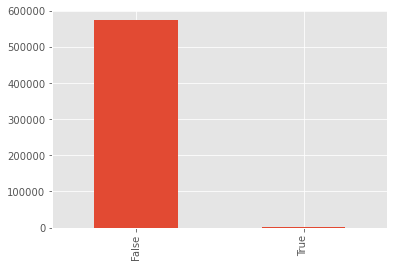

In [117]:
# Is Block 1 labels imbalanced?
block1_df['is_match'].value_counts().plot(kind='bar')

In [118]:
# Apparently so

In [119]:
# Combining all Blocks

In [120]:
for block_no in range(2,10+1):
    block = pd.read_csv(f'donation/block_{block_no}.zip')
    block = pd.concat([block, block1_df])

In [121]:
block.shape

(1149826, 12)

<AxesSubplot:>

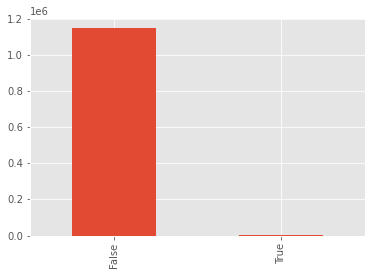

In [122]:
block['is_match'].value_counts().plot(kind='bar')

"""
As mentioned in the Data Set information :
The data set is split into 10 blocks of (approximately) equal size and ratio
of matches to non-matches.
"""

In [123]:
# Working on only block 1 for now,

<AxesSubplot:>

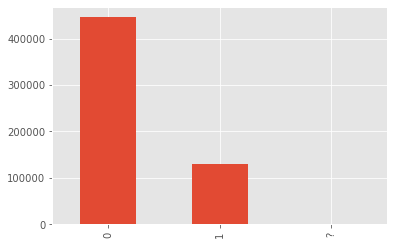

In [124]:
block1_df['cmp_bd'].value_counts().plot(kind='bar')

In [125]:
block1_df['cmp_bd'].value_counts()

0    445650
1    129201
?        62
Name: cmp_bd, dtype: int64

In [126]:
index_bd = block1_df[block1_df['cmp_bd'] == '?'].index
block1_df.drop(index_bd, inplace=True)
block1_df['cmp_bd'].value_counts()

0    445650
1    129201
Name: cmp_bd, dtype: int64

In [127]:
block1_df['cmp_bd'].value_counts()

0    445650
1    129201
Name: cmp_bd, dtype: int64

In [128]:
block1_df['cmp_bd'] = block1_df['cmp_bd'].astype('int32')

<AxesSubplot:>

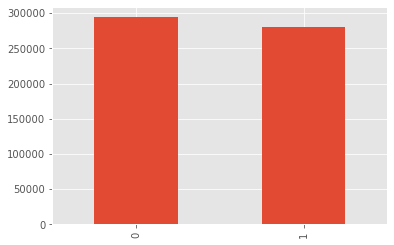

In [129]:
block1_df['cmp_bm'].value_counts().plot(kind='bar')

In [130]:
block1_df['cmp_bm'] = block1_df['cmp_bm'].astype('int32')

<AxesSubplot:>

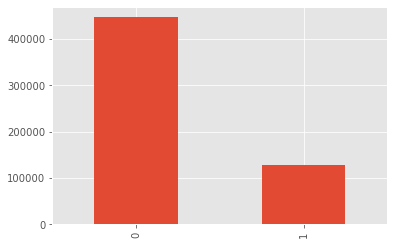

In [131]:
block1_df['cmp_by'].value_counts().plot(kind='bar')

In [132]:
block1_df['cmp_by'] = block1_df['cmp_by'].astype('int32')

<AxesSubplot:>

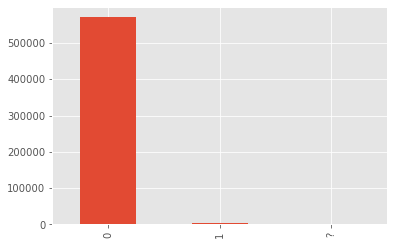

In [133]:
block1_df['cmp_plz'].value_counts().plot(kind='bar')

In [134]:
index_bd = block1_df[block1_df['cmp_plz'] == '?'].index
block1_df.drop(index_bd, inplace=True)
block1_df['cmp_plz'].value_counts()

0    570404
1      3152
Name: cmp_plz, dtype: int64

In [135]:
block1_df['cmp_plz'] = block1_df['cmp_plz'].astype('int32')

In [136]:
block1_df.dtypes

id_1              int64
id_2              int64
cmp_fname_c1     object
cmp_fname_c2     object
cmp_lname_c1    float64
cmp_lname_c2     object
cmp_sex           int64
cmp_bd            int32
cmp_bm            int32
cmp_by            int32
cmp_plz           int32
is_match           bool
dtype: object

In [137]:
block1_df['cmp_fname_c1'].unique()

array(['0.833333333333333', '1', '0.25', '0.875', '0.8',
       '0.888888888888889', '?', '0', '0.818181818181818', '0.5',
       '0.666666666666667', '0.166666666666667', '0.222222222222222',
       '0.4', '0.2', '0.125', '0.285714285714286', '0.428571428571429',
       '0.142857142857143', '0.75', '0.333333333333333',
       '0.111111111111111', '0.444444444444444', '0.375', '0.625', '0.6',
       '0.857142857142857', '0.181818181818182', '0.714285714285714',
       '0.9', '0.1', '0.3', '0.555555555555556', '0.777777777777778',
       '0.571428571428571', '0.7', '0.0909090909090909',
       '0.272727272727273', '0.363636363636364', '0.454545454545455',
       '0.470588235294118', '0.0833333333333334', '0.153846153846154',
       '0.545454545454545', '0.909090909090909'], dtype=object)

In [138]:
index_bd = block1_df[block1_df['cmp_fname_c1'] == '?'].index
block1_df.drop(index_bd, inplace=True)
block1_df['cmp_fname_c1'].value_counts()

1                     350025
0                      45739
0.4                    28089
0.142857142857143      16017
0.166666666666667      15483
0.125                  15466
0.25                   13694
0.111111111111111      12317
0.222222222222222       9619
0.333333333333333       9541
0.2                     8723
0.285714285714286       7933
0.875                   7082
0.5                     4561
0.75                    4549
0.428571428571429       3434
0.375                   3198
0.8                     3189
0.6                     1991
0.444444444444444       1641
0.857142857142857       1630
0.666666666666667       1462
0.888888888888889       1438
0.833333333333333       1344
0.1                     1008
0.9                      746
0.571428571428571        715
0.625                    676
0.3                      637
0.555555555555556        509
0.714285714285714        458
0.777777777777778        289
0.181818181818182         99
0.0909090909090909        40
0.7           

In [139]:
block1_df['cmp_fname_c2'].unique()

array(['?', '1', '0.428571428571429', '0.222222222222222',
       '0.166666666666667', '0.4', '0', '0.285714285714286', '0.2',
       '0.333333333333333', '0.571428571428571', '0.111111111111111',
       '0.142857142857143', '0.875', '0.666666666666667', '0.1', '0.6',
       '0.833333333333333', '0.125', '0.25', '0.375', '0.8', '0.5',
       '0.75', '0.555555555555556', '0.3'], dtype=object)

In [140]:
index_bd = block1_df[block1_df['cmp_fname_c2'] == '?'].index
block1_df.drop(index_bd, inplace=True)
block1_df['cmp_fname_c2'].value_counts()

1                    8963
0                     379
0.4                   188
0.142857142857143     172
0.166666666666667     136
0.285714285714286      94
0.2                    92
0.333333333333333      40
0.125                  36
0.875                  32
0.428571428571429      28
0.25                   24
0.111111111111111      17
0.666666666666667      17
0.222222222222222      17
0.5                    16
0.6                    15
0.571428571428571      15
0.375                   9
0.833333333333333       5
0.555555555555556       3
0.8                     3
0.1                     2
0.3                     1
0.75                    1
Name: cmp_fname_c2, dtype: int64

In [141]:
block1_df['cmp_fname_c1'] = block1_df['cmp_fname_c1'].astype('float64')
block1_df['cmp_fname_c2'] = block1_df['cmp_fname_c2'].astype('float64')

In [142]:
block1_df['cmp_lname_c2'].unique()

array(['?', '1'], dtype=object)

<AxesSubplot:>

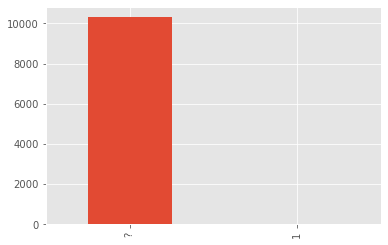

In [143]:
block1_df['cmp_lname_c2'].value_counts().plot(kind='bar')

In [144]:
# Most values in cmp_lname_c2 are ?, seems like its better to drop this row

In [145]:
block1_df = block1_df.drop(['cmp_lname_c2'], axis=1)

In [146]:
block1_df.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
16,16662,27083,1.0,1.0,1.0,1,1,1,1,1,True
17,18823,30204,1.0,1.0,1.0,1,1,1,1,1,True
28,29624,90371,1.0,1.0,1.0,1,1,1,1,1,True
33,94601,94602,1.0,1.0,1.0,1,1,1,1,1,True
35,34195,35649,1.0,1.0,1.0,1,1,1,1,1,True


In [147]:
block1_df.dtypes

id_1              int64
id_2              int64
cmp_fname_c1    float64
cmp_fname_c2    float64
cmp_lname_c1    float64
cmp_sex           int64
cmp_bd            int32
cmp_bm            int32
cmp_by            int32
cmp_plz           int32
is_match           bool
dtype: object

In [150]:
y = block1_df['is_match']
block1_df = block1_df.drop(['is_match', 'id_1', 'id_2'], axis=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(block1_df, y,test_size = 0.2)

In [152]:
model = LogisticRegression()

In [153]:
model.fit(X_train, y_train)

LogisticRegression()

In [154]:
pred = model.predict(X_test)

In [157]:
accuracy_score(y_test, pred)

1.0

In [158]:
# Not Quite the accuracy I expected...

In [159]:
# Using Other Block for testing now

In [160]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline 

In [162]:
block2_df = pd.read_csv('donation/block_2.zip')

In [163]:
def remove_null(X):
    for col in X:    
        if '?' in X[col].value_counts().index: 
            if X[col].value_counts().idxmax() == '?':
                X = X.drop([col], axis=1)
            else:
                index_bd = X[X[col] == '?'].index
                X.drop(index_bd, inplace=True)
    return X

In [164]:
def change_type(X):
    for col in X:    
        X[col] = X[col].astype('float64')
    return X

In [165]:
block2_df.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,6698,40542,1,1,1.0,?,1,1,1,1,1,True
1,45037,49220,1,?,1.0,?,1,1,1,1,1,True
2,31835,69902,1,?,1.0,1,1,1,1,1,1,True
3,4356,31352,0.875,?,1.0,?,1,1,1,1,1,True
4,45723,49837,1,?,1.0,?,1,1,1,1,1,True


In [166]:
block2_df.dtypes

id_1              int64
id_2              int64
cmp_fname_c1     object
cmp_fname_c2     object
cmp_lname_c1    float64
cmp_lname_c2     object
cmp_sex           int64
cmp_bd           object
cmp_bm           object
cmp_by           object
cmp_plz          object
is_match           bool
dtype: object

In [167]:
block2_df = remove_null(block2_df)
block2_df = change_type(block2_df)

In [168]:
block2_df.dtypes

id_1            float64
id_2            float64
cmp_fname_c1    float64
cmp_lname_c1    float64
cmp_sex         float64
cmp_bd          float64
cmp_bm          float64
cmp_by          float64
cmp_plz         float64
is_match        float64
dtype: object

In [169]:
block2_df.head()

,id_1,id_2,cmp_fname_c1,cmp_lname_c1,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,6698.0,40542.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,45037.0,49220.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,31835.0,69902.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4356.0,31352.0,0.875,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,45723.0,49837.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [170]:
y_2 = block2_df['is_match']

In [175]:
x_2 = block2_df.drop(['is_match', 'id_1', 'id_2'], axis=1)

In [176]:
x_2.dtypes

cmp_fname_c1    float64
cmp_lname_c1    float64
cmp_sex         float64
cmp_bd          float64
cmp_bm          float64
cmp_by          float64
cmp_plz         float64
dtype: object

In [174]:
pred = model.predict(x_2)

ValueError: X has 7 features per sample; expecting 8

In [178]:
# So Dropping Columns based on Null values is not feasible as some blocks have diff features which are majority null.

In [245]:
# Updating Function
def remove_null(X, columns):
    for col in columns:   
        X[col] = X[col].replace(['?'], 0)
#         if X[col].value_counts().idxmax() == '?':
#             X[X[col] == '?'] = 0
#         else:
#             index_bd = X[X[col] == '?'].index
#             X.drop(index_bd, inplace=True)
    return X

In [246]:
block1_df = pd.read_csv('donation/block_1.zip')

In [247]:
block1_df = remove_null(block1_df, columns = ['cmp_fname_c1','cmp_fname_c2', 'cmp_lname_c2', 'cmp_bd','cmp_by','cmp_bm', 'cmp_plz'])
block1_df = change_type(block1_df)

In [248]:
y = block1_df['is_match']
X = block1_df.drop(['is_match', 'id_1', 'id_2'], axis=1)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [250]:
model = LogisticRegression()

In [251]:
model.fit(X_train, y_train)

LogisticRegression()

In [252]:
pred = model.predict(X_test)

In [253]:
accuracy_score(y_test, pred)

1.0

In [256]:
for block_no in range(2,10+1):
    block = pd.read_csv(f'donation/block_{block_no}.zip')
    print(block['is_match'].value_counts())
    block = remove_null(block, columns = ['cmp_fname_c1','cmp_fname_c2', 'cmp_lname_c2', 'cmp_bd','cmp_by','cmp_bm', 'cmp_plz'])
    block = change_type(block)
    y = block['is_match']
    X = block.drop(['is_match', 'id_1', 'id_2'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)
    print(f'y\n{y.value_counts()}')
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'Block: {block_no} - Accuracy: {accuracy}')
    

False    572820
True       2093
Name: is_match, dtype: int64
y
0.0    572820
1.0      2093
Name: is_match, dtype: int64
Block: 2 - Accuracy: 1.0
False    572820
True       2093
Name: is_match, dtype: int64
y
0.0    572820
1.0      2093
Name: is_match, dtype: int64
Block: 3 - Accuracy: 1.0
False    572820
True       2093
Name: is_match, dtype: int64
y
0.0    572820
1.0      2093
Name: is_match, dtype: int64
Block: 4 - Accuracy: 0.9999652122487672
False    572820
True       2094
Name: is_match, dtype: int64
y
0.0    572820
1.0      2094
Name: is_match, dtype: int64
Block: 5 - Accuracy: 0.9999826061243836
False    572821
True       2093
Name: is_match, dtype: int64
y
0.0    572821
1.0      2093
Name: is_match, dtype: int64
Block: 6 - Accuracy: 0.9999913030621917
False    572820
True       2093
Name: is_match, dtype: int64
y
0.0    572820
1.0      2093
Name: is_match, dtype: int64
Block: 7 - Accuracy: 0.9999826061243836
False    572820
True       2093
Name: is_match, dtype: int64
y
0.0    

Heavily Imbalanced Dataset...

In [258]:
for block_no in range(2,10+1):
    block = pd.read_csv(f'donation/block_{block_no}.zip')
    block = pd.concat([block, block1_df])
        
block = remove_null(block, columns = ['cmp_fname_c1','cmp_fname_c2', 'cmp_lname_c2', 'cmp_bd','cmp_by','cmp_bm', 'cmp_plz'])
block = change_type(block)
y = block['is_match']
X = block.drop(['is_match', 'id_1', 'id_2'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)
print(f'y\n{y.value_counts()}')
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'Block: {block_no} - Accuracy: {accuracy}')


y
0.0    1145640
1.0       4186
Name: is_match, dtype: int64
Block: 10 - Accuracy: 0.9999826061243836


In [260]:
confusion_matrix(y_test, pred)

array([[229142,      1],
       [     3,    820]], dtype=int64)